In [1]:
# https://medium.com/@nitin9809/lightgbm-binary-classification-multi-class-classification-regression-using-python-4f22032b36a2
# https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
#importing libraries
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score,accuracy_score,confusion_matrix
from IPython.display import display

In [2]:
#loading the breast cancer dataset
data = load_breast_cancer()
breast_cancer = pd.DataFrame(data.data,columns=data.feature_names)
Y = pd.DataFrame(data.target,columns=['target'])
display(breast_cancer) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#scaling the features using Standard Scaler
sc=StandardScaler()
sc.fit(breast_cancer)
X=pd.DataFrame(sc.fit_transform(breast_cancer), columns=data.feature_names)
display(X) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [4]:
#train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
display(X_train)
display(y_train) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,-0.749028,-1.093640,-0.740560,-0.710995,0.586383,-0.418088,-0.448455,-0.753936,-0.119089,0.417114,...,-0.801242,-0.615097,-0.751235,-0.725988,0.124117,-0.338840,-0.060394,-0.613574,0.065106,0.435246
303,-1.033042,-0.158159,-1.034246,-0.911788,0.742947,-0.711836,-0.826485,-0.802687,-1.203419,0.453972,...,-1.078732,-0.185190,-1.087219,-0.888068,0.391516,-0.953351,-0.901735,-0.751071,-1.112638,-0.306218
155,-0.533178,-0.314072,-0.564266,-0.553431,-0.698865,-0.711647,-0.627112,-0.660562,0.578241,-0.073377,...,-0.554813,-0.074456,-0.615412,-0.556174,-0.467667,-0.480063,-0.373672,-0.494807,0.343365,-0.145512
186,1.187949,-0.165140,1.096935,1.098139,-0.745834,-0.372605,-0.089257,0.237843,-0.695938,-1.211713,...,1.043864,0.111186,0.951324,0.930669,-0.393146,-0.062119,0.391533,0.647036,0.493818,-0.807177
101,-2.029648,-1.363580,-1.984504,-1.454443,1.468835,-0.543168,-1.114873,-1.261820,0.432204,2.180614,...,-1.726901,-0.999409,-1.693361,-1.222423,1.141110,-0.852841,-1.305831,-1.745063,0.050546,0.547186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1.329956,0.160649,1.191672,1.271629,-0.507430,-0.862311,-0.107964,0.245323,-0.955155,-1.819865,...,0.764302,-0.224272,0.647508,0.624792,-0.353694,-0.879559,-0.245578,0.225259,-0.539944,-1.472721
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856
359,-1.332393,-0.225644,-1.324225,-1.070205,0.323071,-0.848666,-0.774633,-0.899156,-1.115796,0.962892,...,-0.879933,-0.107025,-0.937396,-0.775210,0.040829,-0.950170,-0.756994,-0.975815,-0.722753,-0.143295
192,-1.251733,-0.248914,-1.286742,-1.043186,-1.911524,-1.533193,-1.114873,-1.261820,-0.579108,0.237079,...,-1.304866,-0.789340,-1.340697,-1.013934,-2.682695,-1.443878,-1.305831,-1.745063,-1.604443,-1.017203


,target
478,1
303,1
155,1
186,0
101,1
...,...
277,0
9,0
359,1
192,1


In [5]:
#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

In [6]:
#Specifying the parameter
params={}
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['application']='binary' #Specifies the application of your model
params['objective']='binary' #Binary target feature
params['metric']='auc' #Metric for binary classification
params['max_depth']=10
params['verbose']= 0

In [7]:
#train the model 
model = lgb.train(params,d_train,100) #train the model on 100 epocs

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

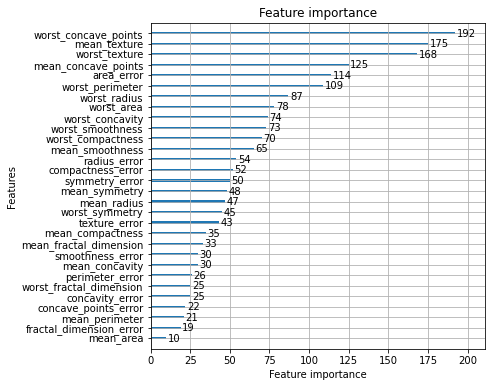

In [8]:
ax = lgb.plot_importance(model, max_num_features=40, figsize=(6,6))

In [9]:
#prediction on the test set
y_pred=model.predict(X_test)
Y_pred = pd.DataFrame(y_pred,columns=['prediction'])
display(Y_pred) 

,prediction
0,0.000040
1,0.987169
2,0.999952
3,0.997990
4,0.999563
...,...
166,0.000279
167,0.000026
168,0.999352
169,0.999949


In [10]:
#prediction on the test set
y_pred = model.predict(X_test)

#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:
        y_pred[i]=0

Y_pred = pd.DataFrame(y_pred,columns=['prediction'])
display(Y_pred)

,prediction
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
166,0.0
167,0.0
168,1.0
169,1.0


In [11]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

#Accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))

#AUC
roc=roc_auc_score(y_pred,y_test)
print('AUC: '+str(roc))

Confusion matrix:
[[ 59   4]
 [  1 107]]
Accuracy: 0.9707602339181286
AUC: 0.9736486486486485


In [12]:
#loading the wine dataset
data = load_wine()
wine = pd.DataFrame(data.data,columns=data.feature_names)
Y = pd.DataFrame(data.target,columns=['target'])
display(wine) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
#scaling the features using Standard Scaler
sc=StandardScaler()
sc.fit(wine)
X=pd.DataFrame(sc.fit_transform(wine), columns=data.feature_names)
display(X) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [14]:
#train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
display(X_train)
display(y_train)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,0.876275,-0.427600,-0.023821,-0.869308,0.088358,0.504554,0.854105,-0.740141,0.173634,-0.544212,0.669291,1.960915,0.917474
108,-0.964270,-0.939268,-1.559065,-0.148624,-0.543562,0.103972,0.010773,0.226796,0.856946,-1.020039,-0.427544,0.576721,-1.384915
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
145,0.196879,1.107404,-0.791443,0.451946,0.158572,-1.274034,-1.485138,0.549108,-0.509679,-0.457698,-1.568252,-1.315952,0.264653
71,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,0.834026,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-1.458376,-0.553273,-1.778385,0.001518,-0.964842,0.328298,-0.390814,0.065639,-0.299429,-1.296884,-0.076557,-0.242496,-1.056912
67,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385
117,-0.717217,-0.652016,-0.645229,0.902373,0.579852,-0.472868,0.060971,-0.176095,0.033467,-1.296884,0.449924,0.491974,-1.279827
47,1.110975,-0.589180,-0.901103,-1.049479,0.088358,1.289697,1.366128,-1.223610,0.962071,0.450699,-0.208177,1.014578,0.758249


,target
22,0
108,1
175,2
145,2
71,1
...,...
103,1
67,1
117,1
47,0


In [15]:
#converting the dataset into proper LGB format 
d_train=lgb.Dataset(X_train, label=y_train)

In [16]:
#Specifying the parameter
params={}
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['application']='multiclass' #Specifies the application of your model
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=3
params['verbose']= 0

In [17]:
#train the model 
model = lgb.train(params,d_train,100) #train the model on 100 epocs

[LightGBM] [Warning] objective is set=multiclass, application=multiclass will be ignored. Current value: objective=multiclass
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] objective is set=multiclass, application=multiclass will be ignored. Current value: objective=multiclass
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

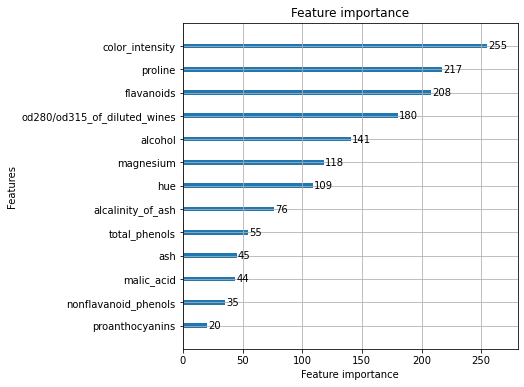

In [18]:
ax = lgb.plot_importance(model, max_num_features=40, figsize=(6,6))

In [19]:
#prediction on the test set
y_pred=model.predict(X_test)
Y_pred = pd.DataFrame(y_pred)
display(Y_pred) 

,0,1,2
0,9.999975e-01,0.000001,1.143808e-06
1,1.672523e-05,0.000406,9.995775e-01
2,3.641533e-03,0.996304,5.422180e-05
3,9.999791e-01,0.000011,1.026129e-05
4,4.451562e-04,0.999504,5.110248e-05
5,7.551414e-01,0.240819,4.039903e-03
6,9.999977e-01,0.000001,1.280258e-06
7,2.979337e-06,0.000308,9.996888e-01
8,1.099816e-06,0.999999,3.663089e-07
9,4.443040e-07,0.999997,2.231907e-06


In [20]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred]
y_pred_1 = pd.DataFrame(y_pred_1)
display(y_pred_1) 

,0
0,0
1,2
2,1
3,0
4,1
5,0
6,0
7,2
8,1
9,1


In [21]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_1)
print('Confusion matrix:')
print(cm)

#Accuracy
accuracy=accuracy_score(y_pred_1,y_test)
print('Accuracy: '+str(accuracy))

Confusion matrix:
[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]
Accuracy: 0.9444444444444444


In [22]:
#loading the Boston Dataset
data = load_boston()
boston = pd.DataFrame(data.data,columns=data.feature_names)
Y = pd.DataFrame(data.target,columns=['target'])
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
#scaling the features using Standard Scaler
sc=StandardScaler()
sc.fit(boston)
X=pd.DataFrame(sc.fit_transform(boston), columns=data.feature_names)
display(X) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [24]:
#train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
display(X_train)
display(y_train)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,-0.230987,-0.487722,1.568995,-0.272599,0.598679,-1.803097,1.117494,-1.119800,-0.637962,0.170831,1.268938,0.441052,3.049752
272,-0.407181,0.370669,-0.609431,-0.272599,-0.783454,0.360960,-0.351157,0.058212,-0.752922,-1.100176,0.066796,0.419781,-0.690084
135,-0.355607,-0.487722,1.568995,-0.272599,0.598679,0.071754,1.053485,-0.800685,-0.637962,0.170831,1.268938,0.416601,0.603720
298,-0.412993,2.516647,-1.298123,-0.272599,-1.336307,0.086000,-1.723795,1.917048,-0.523001,-0.298373,-1.690182,0.126813,-1.076964
122,-0.409696,-0.487722,2.117615,-0.272599,0.227231,-0.461069,0.865014,-0.811998,-0.867883,-1.308051,0.297977,0.234812,0.739688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.387477,-0.487722,-0.548149,-0.272599,-0.532942,-0.821507,0.203588,0.440219,-0.523001,-0.720062,0.529158,0.377788,-0.127988
192,-0.410435,1.443658,-1.123032,-0.272599,-1.016689,1.272741,-1.503320,1.276251,-0.523001,-0.060801,-1.505237,0.370770,-1.371329
117,-0.402947,-0.487722,-0.164408,-0.272599,-0.066472,-0.375589,0.498741,-0.498017,-0.408041,0.141134,-0.303094,0.414847,-0.329838
47,-0.393837,-0.487722,-0.616727,-0.272599,-0.921667,-0.362767,0.601866,0.900519,-0.752922,-1.040783,-0.256858,0.395440,0.861639


,target
141,14.4
272,24.4
135,18.1
298,22.5
122,20.5
...,...
323,18.5
192,36.4
117,19.2
47,16.6


In [25]:
#Converting the data into proper LGB Dataset Format
d_train=lgb.Dataset(X_train, label=y_train)

In [26]:
#Specifying the parameter
params={}
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['application']='regression' #Specifies the application of your model
params['objective']='regression'#regression task
params['metric']='rmse' #Metric for regression task
params['max_depth']=10

In [27]:
#model creation and training
model=lgb.train(params,d_train, 100)

[LightGBM] [Warning] objective is set=regression, application=regression will be ignored. Current value: objective=regression
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] objective is set=regression, application=regression will be ignored. Current value: objective=regression
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 13
[LightGBM] [Info] Start training from score 22.745480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

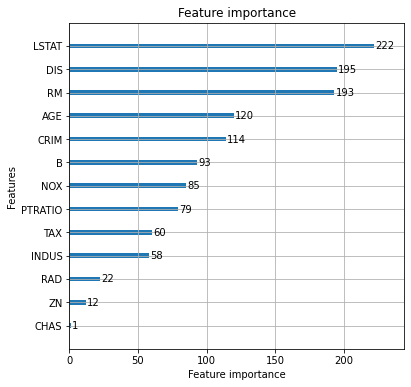

In [28]:
ax = lgb.plot_importance(model, max_num_features=40, figsize=(6,6))

In [29]:
#prediction on the test set
y_pred=model.predict(X_test)
Y_pred = pd.DataFrame(y_pred)
display(Y_pred) 

,0
0,23.684750
1,25.535007
2,24.326736
3,9.532148
4,20.579039
...,...
147,34.783971
148,9.623470
149,10.057969
150,30.233802


In [30]:
#using RMSE error metric
mse = mean_squared_error(y_pred,y_test)
print('RMSE: '+str(mse))

RMSE: 18.194041981690066
